In [1]:
#HeartDiseaseClassification

import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.shape

(303, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Visualization

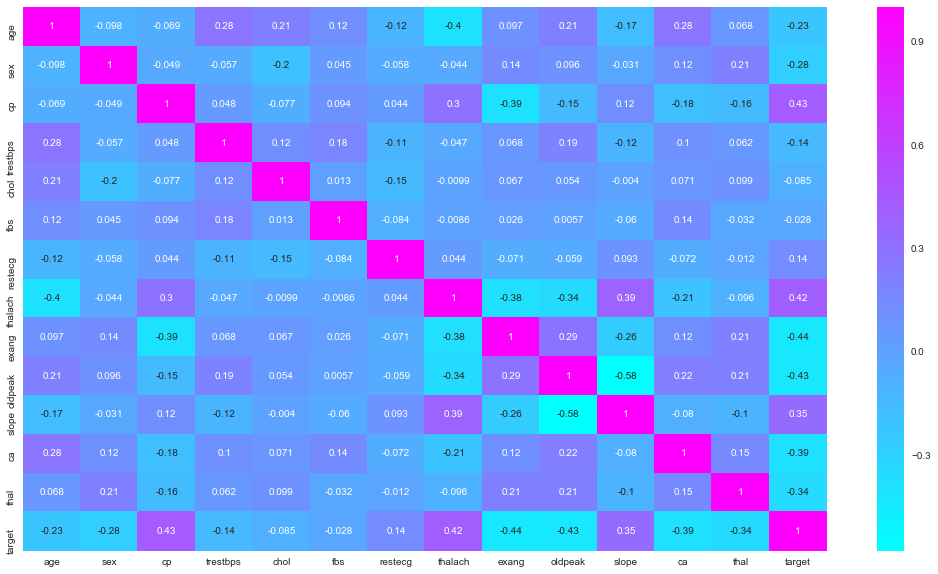

In [9]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.show()

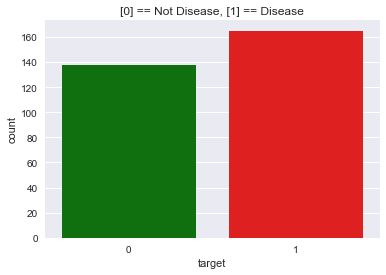

In [10]:
sns.countplot(df.target, palette=['green', 'red'])
plt.title("[0] == Not Disease, [1] == Disease");

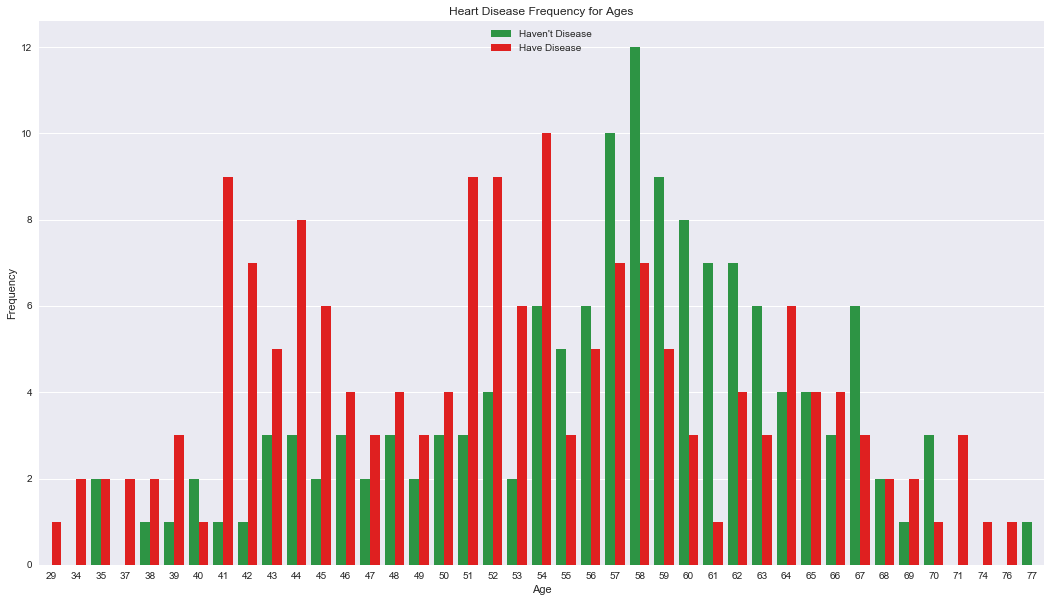

In [11]:
plt.figure(figsize=(18, 10))
sns.countplot(x='age', hue='target', data=df, palette=['#1CA53B', 'red'])
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

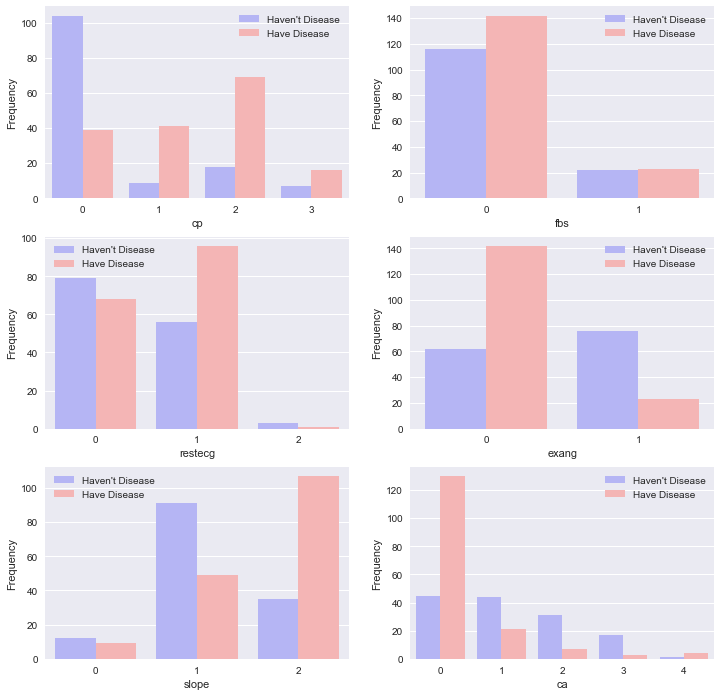

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(12,12))
fs = ['cp', 'fbs', 'restecg','exang', 'slope', 'ca']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='target', data=df, palette='bwr', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Haven't Disease", "Have Disease"])

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

AttributeError: module 'seaborn' has no attribute 'scatterplot'

<Figure size 576x432 with 0 Axes>

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

AttributeError: module 'seaborn' has no attribute 'scatterplot'

<Figure size 576x432 with 0 Axes>

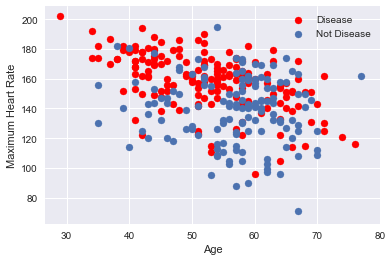

In [15]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Machine Learning

In [16]:
from sklearn.preprocessing import StandardScaler

# Import tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [17]:
# Define our feasures and leabels
X = df.drop(['target'], axis=1).values
y = df['target'].values

In [18]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [19]:
class Model:
    def __init__(self, model, X, y):
        self.model = model
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.5, random_state=42)
        
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        
    def model_str(self):
        return str(self.model.__class__.__name__)
    
    def crossValScore(self, cv=5):
        print(self.model_str() + "\n" + "="*60)
        scores = ["accuracy", "precision", "recall", "roc_auc"]
        for score in scores:  
            cv_acc = cross_val_score(self.model, 
                                     self.X_train, 
                                     self.y_train, 
                                     cv=cv, 
                                     scoring=score).mean()
            
            print("Model " + score + " : " + "%.3f" % cv_acc)
        
    def accuracy(self):
        accuarcy = accuracy_score(self.y_test, self.y_pred)
        print(self.model_str() + " Model " + "Accuracy is: ")
        return accuarcy
        
    def confusionMatrix(self):        
        plt.figure(figsize=(6, 6))
        mat = confusion_matrix(self.y_test, self.y_pred)
        sns.heatmap(mat.T, square=True, 
                    annot=True, 
                    cbar=False, 
                    xticklabels=["Haven't Disease", "Have Disease"], 
                    yticklabels=["Haven't Disease", "Have Disease"])
        
        plt.title(self.model_str() + " Confusion Matrix")
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values');
        plt.show();
        
    def classificationReport(self):
        print(self.model_str() + " Classification Report" + "\n" + "="*60)
        print(classification_report(self.y_test, 
                                    self.y_pred, 
                                    target_names=['Non Disease', 'Disease']))
    
    def rocCurve(self):
        y_prob = self.model.predict_proba(self.X_test)[:,1]
        fpr, tpr, thr = roc_curve(self.y_test, y_prob)
        lw = 2
        plt.figure(figsize=(10, 8))
        plt.plot(fpr, tpr, 
                 color='darkorange', 
                 lw=lw, 
                 label="Curve Area = %0.3f" % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], color='green', 
                 lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(self.model_str() + ' Receiver Operating Characteristic Plot')
        plt.legend(loc="lower right")
        plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = Model(model=RandomForestClassifier(n_estimators=1000), X=X, y=y)

In [21]:
clf.crossValScore(cv=10)

RandomForestClassifier
Model accuracy : 0.802
Model precision : 0.806
Model recall : 0.832
Model roc_auc : 0.906


In [22]:
clf.accuracy()

RandomForestClassifier Model Accuracy is: 


0.8289473684210527

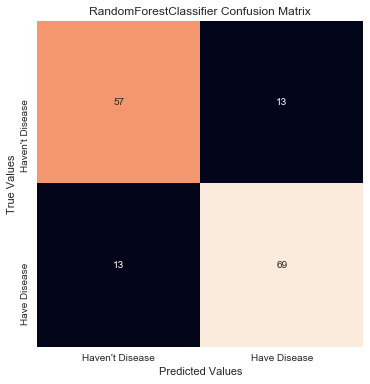

In [23]:
clf.confusionMatrix()

In [24]:
clf.classificationReport()

RandomForestClassifier Classification Report
             precision    recall  f1-score   support

Non Disease       0.81      0.81      0.81        70
    Disease       0.84      0.84      0.84        82

avg / total       0.83      0.83      0.83       152



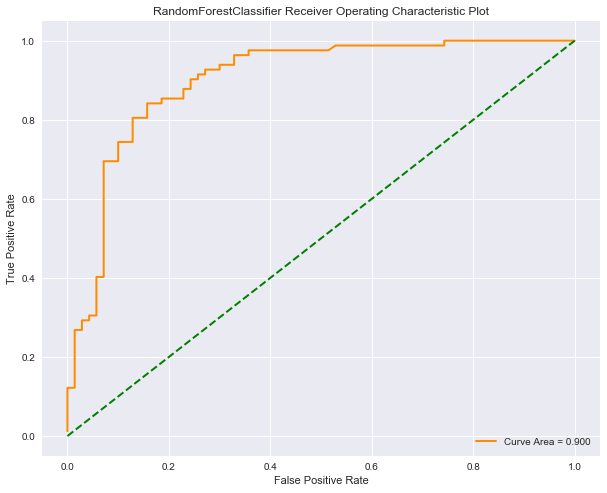

In [25]:
clf.rocCurve()

In [26]:
from sklearn.svm import SVC

svm = Model(model=SVC(C=5, probability=True), X=X, y=y)

In [27]:
svm.crossValScore(cv=10)

SVC
Model accuracy : 0.768
Model precision : 0.796
Model recall : 0.771
Model roc_auc : 0.867


In [28]:
svm.accuracy()

SVC Model Accuracy is: 


0.7697368421052632

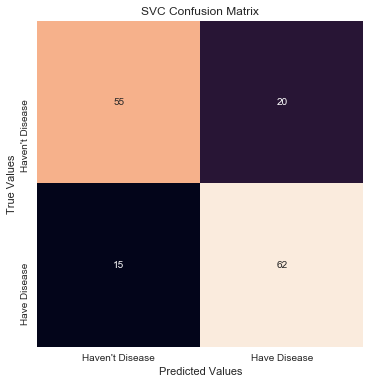

In [29]:
svm.confusionMatrix()

In [30]:
svm.classificationReport()

SVC Classification Report
             precision    recall  f1-score   support

Non Disease       0.73      0.79      0.76        70
    Disease       0.81      0.76      0.78        82

avg / total       0.77      0.77      0.77       152



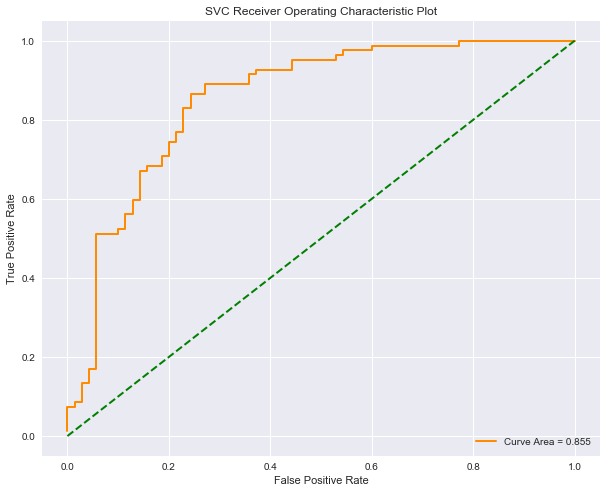

In [31]:
svm.rocCurve()

In [32]:
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

lr = LogisticRegression(C=10, n_jobs=-1)
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), lr)

pip = Model(model=pipeline, X=X, y=y)

In [33]:
pip.crossValScore()

Pipeline
Model accuracy : 0.794
Model precision : 0.814
Model recall : 0.817
Model roc_auc : 0.900


In [34]:
pip.accuracy()

Pipeline Model Accuracy is: 


0.8157894736842105

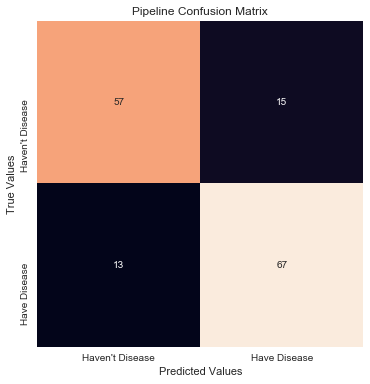

In [35]:
pip.confusionMatrix()

In [36]:
pip.classificationReport()

Pipeline Classification Report
             precision    recall  f1-score   support

Non Disease       0.79      0.81      0.80        70
    Disease       0.84      0.82      0.83        82

avg / total       0.82      0.82      0.82       152



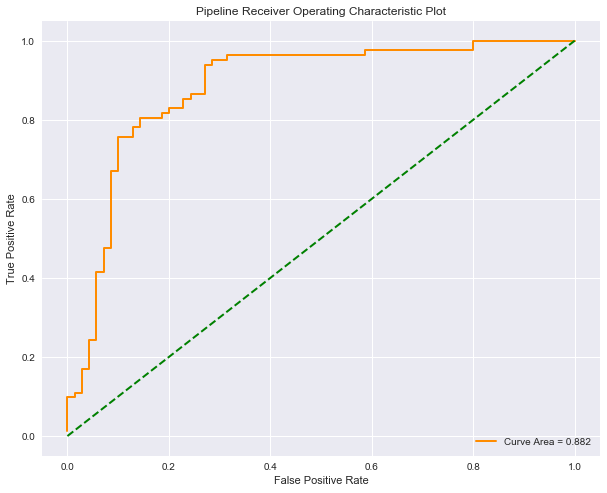

In [37]:
pip.rocCurve()

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = Model(model=KNeighborsClassifier(n_neighbors=100), X=X, y=y)

In [39]:
knn.crossValScore()

KNeighborsClassifier
Model accuracy : 0.684
Model precision : 0.638
Model recall : 1.000
Model roc_auc : 0.904


In [40]:
knn.accuracy()

KNeighborsClassifier Model Accuracy is: 


0.7960526315789473

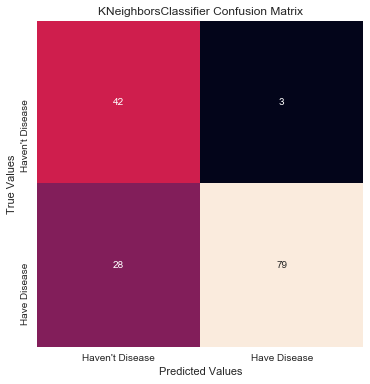

In [41]:
knn.confusionMatrix()

In [42]:
knn.classificationReport()

KNeighborsClassifier Classification Report
             precision    recall  f1-score   support

Non Disease       0.93      0.60      0.73        70
    Disease       0.74      0.96      0.84        82

avg / total       0.83      0.80      0.79       152



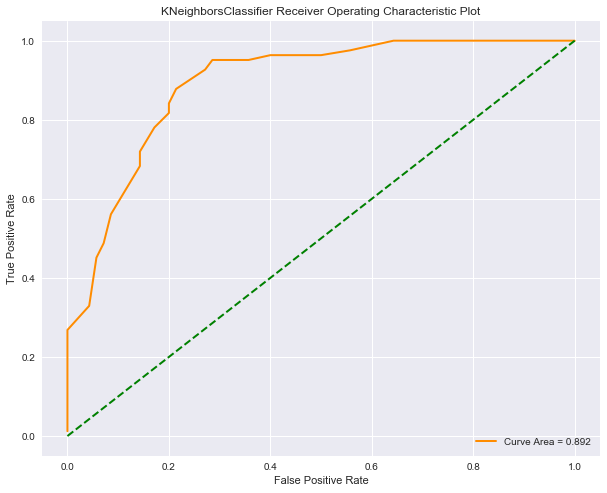

In [43]:
knn.rocCurve()

In [44]:
models = [clf, svm, pip, knn]
names = []
accs = []
for model in models:
    accs.append(model.accuracy())
    names.append(model.model_str())

RandomForestClassifier Model Accuracy is: 
SVC Model Accuracy is: 
Pipeline Model Accuracy is: 
KNeighborsClassifier Model Accuracy is: 


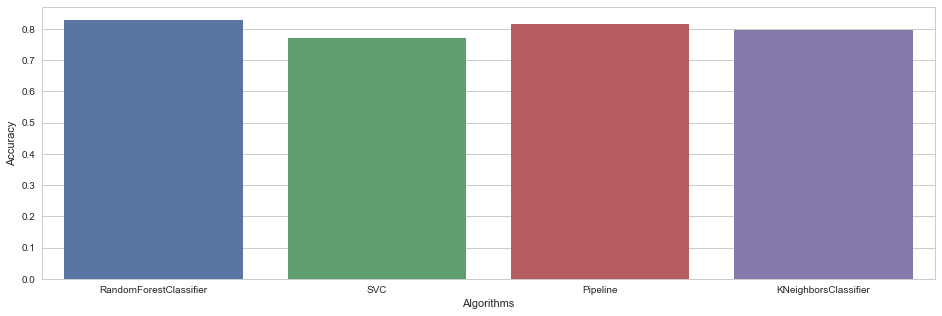

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1.2,0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=names, y=accs)
plt.savefig('models_accuracy.png')
plt.show()